In [1]:
import xarray as xr
import grib2io
import pandas as pd
import datetime
from glob import glob
from tqdm.auto import tqdm
import numpy as np
import multiprocessing
from numba import jit
import scipy
from netCDF4 import Dataset


import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import matplotlib
from mpl_toolkits.basemap import Basemap
matplotlib.rcParams.update({
 "savefig.facecolor": "w",
 "figure.facecolor" : 'w',
 "figure.figsize" : (8,6),
 "text.color": "k",
 "legend.fontsize" : 20,
 "font.size" : 30,
 "axes.edgecolor": "k",
 "axes.labelcolor": "k",
 "axes.linewidth": 3,
 "xtick.color": "k",
 "ytick.color": "k",
 "xtick.labelsize" : 25,
 "ytick.labelsize" : 25,
 "ytick.major.size" : 12,
 "xtick.major.size" : 12,
 "ytick.major.width" : 2,
 "xtick.major.width" : 2,
 "font.family": 'STIXGeneral',
 "mathtext.fontset" : "cm"})

In [2]:
ds = xr.open_dataset('/scratch2/STI/mdl-sti/Sidney.Lower/blend-qmd-dev/supplemental_locations/sidney_files/test/TEST_blend.supplemental_locations_1.co.2p5.nc',
             mode="r")

In [4]:
ds

<xarray.Dataset>
Dimensions:        (ya: 1597, xa: 2345, xsupp: 50)
Coordinates:
    latitude       (ya, xa) float32 ...
    longitude      (ya, xa) float32 ...
Dimensions without coordinates: ya, xa, xsupp
Data variables:
    xlocations     (xsupp, ya, xa) float64 ...
    ylocations     (xsupp, ya, xa) float64 ...
    nsupplemental  (ya, xa) float32 ...
    differences    (xsupp, ya, xa) float32 ...
Attributes:
    domain:   co
    month:    1

In [11]:
np.shape(ds.nsupplemental.data)

(1597, 2345)

In [37]:
np.where(ds.nsupplemental.data != 50)

(array([921, 921, 922, 922, 923, 923, 924, 924, 925, 925]),
 array([1568, 1569, 1568, 1569, 1568, 1569, 1568, 1569, 1567, 1568]))

In [39]:
ds.nsupplemental.data[922, 1568]

1.0

In [26]:
#unpack lats and lons to index over
lat_arr = ds.latitude.data.T[0]
lon_arr = ds.longitude.data[0]

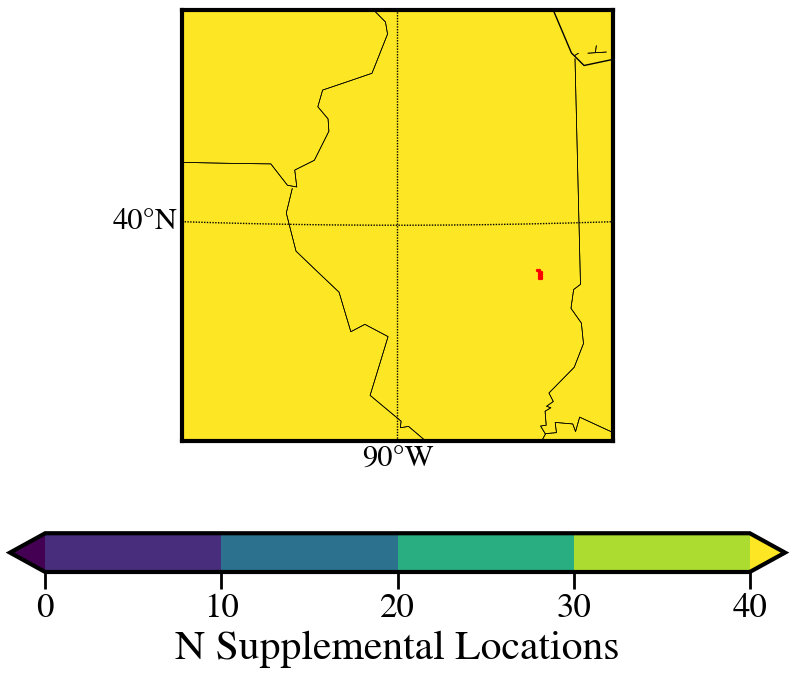

In [36]:
fig, axes = plt.subplots(1,1, figsize=(10,8))
lats, lons = ds.latitude.data, ds.longitude.data
clevs_nsupp = np.arange(0,50,10)
m = Basemap(projection='lcc',lon_0=-90,lat_0=40,width=0.5e6,height=0.5e6, resolution='l')
xx, yy = m(lons,lats) #note to self, x=lons y=lats

cs = m.contourf(xx,yy,ds.nsupplemental.data,extend='both',ax=axes,levels=clevs_nsupp)


lat_idx, lon_idx = np.asarray(np.where(ds.nsupplemental.data != 50))
sl_lons = lon_arr[lon_idx.astype(int)]
sl_lats = lat_arr[lat_idx.astype(int)]
x, y = m(sl_lons, sl_lats)  # transform coordinates
plt.scatter(x, y, s=2, 
            marker='o', color='red')

m.drawcoastlines(ax=axes)
m.drawcountries(ax=axes)
m.drawstates(ax=axes)
m.drawparallels(np.arange(-90.,120.,10.), labels=[1,0,0,0],fontsize=22,ax=axes)
m.drawmeridians(np.arange(0.,360.,10.), labels=[0,0,0,1],fontsize=22,ax=axes)

cbar=plt.colorbar(cs,orientation='horizontal')
cbar.set_label('N Supplemental Locations')

In [30]:
sl_lons

array([255.93988, 255.93988, 255.9645 , 255.9645 , 255.9891 , 255.9891 ,
       256.01373, 256.01373, 256.03833, 256.03833], dtype=float32)

In [31]:
sl_lats

array([52.519825, 52.538834, 52.519825, 52.538834, 52.519825, 52.538834,
       52.519825, 52.538834, 52.500813, 52.519825], dtype=float32)

In [16]:
ds.differences[1].data

array([[0.20450431, 0.20428768, 0.2040826 , ..., 0.20185879, 0.20218173,
        0.20256683],
       [0.2046315 , 0.20436272, 0.20426965, ..., 0.20355906, 0.20358287,
        0.20360999],
       [0.2050743 , 0.20481646, 0.20474978, ..., 0.20378841, 0.20394373,
        0.20367908],
       ...,
       [0.20620975, 0.20504662, 0.2051281 , ..., 0.25440106, 0.25439048,
        0.2524255 ],
       [0.20542604, 0.20493352, 0.20489754, ..., 0.2568471 , 0.25763705,
        0.25071174],
       [0.20855968, 0.20657095, 0.20662041, ..., 0.26177788, 0.26270425,
        0.25627267]], dtype=float32)

## plot locations

In [ ]:
ds = xr.open_dataset('/scratch2/STI/mdl-sti/Sidney.Lower/blend-qmd-dev/supplemental_locations/sidney_files/test/TEST_blend.supplemental_locations_1.co.2p5.nc',
             mode="r")

In [6]:
from nimbl import stations  #.from_mos2ktbl

station_data = '//scratch1/NCEPDEV/mdl/Eric.Engle/gitrepos/blend/fix/common/mdl_station.tbl'

In [9]:
station_points = stations.from_mos2ktbl(station_data, ['KSEA','KMSP','KBOS', 'KLAS','KLIT','KMCO'])

In [10]:
station_points

,call,link1,name,state,elev,lat,lon,tz,comment
0,KSEA,SEA,SEATTLE-TACOMA,WA,450,47.4500,-122.3000,-8,COMMISSIONED 10/01/96 NWRFC ...
1,KMSP,MSP,MINNEAPOLIS,MN,838,44.8833,-93.2167,-6,COMMISSIONED 06/01/96 MBRFC ...
2,KBOS,BOS,BOSTON,MA,29,42.3667,-71.0333,-5,COMMISSIONED ASOS 4/1/96 ...
3,KLAS,LAS,LAS VEGAS ASOS,NV,2180,36.0833,-115.1667,-8,COMMISSIONED 9/1/95 CNRFC/CBRFC RPT TIME-...
4,KLIT,LIT,LITTLE ROCK,AR,257,34.7333,-92.2333,-6,...
5,KMCO,MCO,ORLANDO INTL,FL,105,28.4333,-81.3167,-5,COMMISSIONED 07/01/96 ...


In [22]:
station_lats = station_points['lat']
station_lons = 180 - np.array(np.abs(station_points['lon'])) + 180 #need to convert from E/W to 0-360

In [23]:
#unpack lats and lons to index over
lat_arr = ds.latitude.data.T[0]
lon_arr = ds.longitude.data[0]

In [24]:
## get CONUS grid point closest to chosen lat/lon
def get_nearest_grid(lat_input, long_input):

    lat_index, long_index = [],[]
    for lat in lat_input:
        lat_index.append(np.argmin((lat_arr-lat)**2))
    for long in long_input:
        long_index.append(np.argmin((lon_arr-long)**2))
    return long_index, lat_index

lon_idx, lat_idx = get_nearest_grid(station_lats, station_lons)


In [25]:
#load MSWEP precip data just to plot over

precip = xr.open_mfdataset(sorted(glob('/scratch2/STI/mdl-sti/Sidney.Lower/mswep/mswep_interp/co/2023/2023016.*.nc')), 
                           combine="nested", engine='h5netcdf',concat_dim='time')

In [26]:
precip_totals = precip.precipitation.sum(dim='time').data.compute()

In [27]:
precip_totals = np.where(precip_totals <= 0.254, precip_totals*0., precip_totals)

Text(0.5, 1.0, 'Supplemental Locations for MSP January 2023')

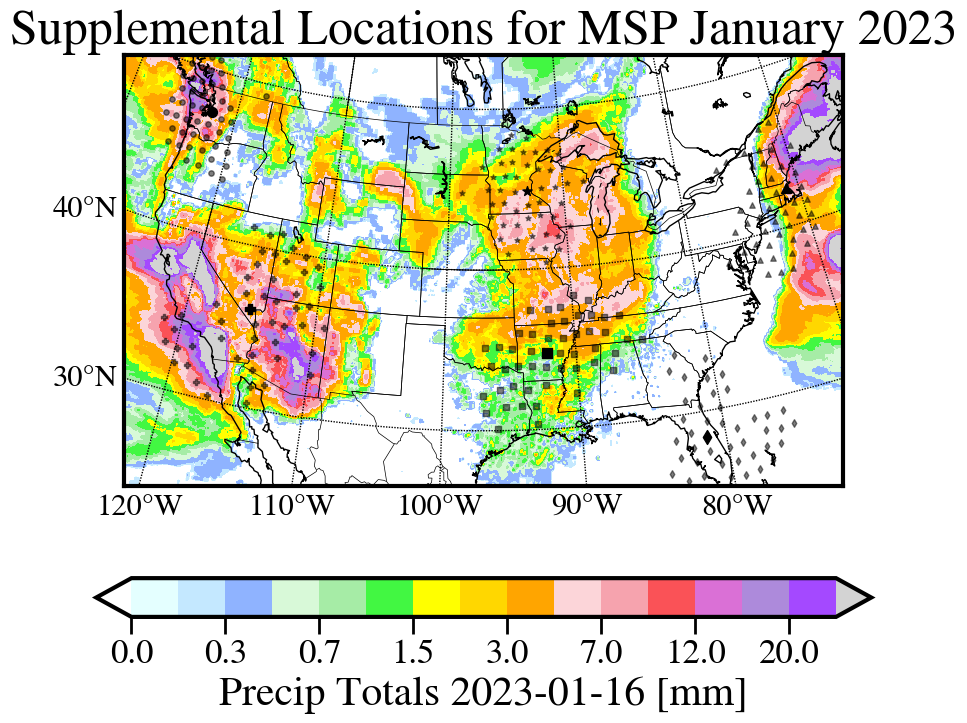

In [32]:
fig, axes = plt.subplots(1,1, figsize=(10,8))

clevs_precip = np.array([0.0,0.1,0.3,0.5,0.7,1.0,1.5,2.0,3.0,5.0,7.0,10.0,12.0,15.0,20.,25.])

colorst = ['White','#E4FFFF','#C4E8FF','#8FB3FF','#D8F9D8',\
    '#A6ECA6','#42F742','Yellow','Gold','Orange','#FCD5D9','#F6A3AE',\
        '#FA5257','Orchid','#AD8ADB','#A449FF','LightGray'] 

#GEFS
lats, lons = precip.latitude.data, precip.longitude.data
m = Basemap(projection='lcc',lon_0=-97,lat_0=40,width=5e6,height=3e6, resolution='l')
xx, yy = m(lons,lats) #note to self, x=lons y=lats

cs = m.contourf(xx,yy,precip_totals,extend='both',ax=axes,levels= clevs_precip,cmap=None, colors=colorst)
cbar=plt.colorbar(cs,orientation='horizontal')
cbar.set_label('Precip Totals 2023-01-16 [mm]')


#supp locations
markers=['o', '*', '^', 'P', 's', 'd']
for loc in range(len(station_lats)):
    #plot orgin points
    x, y = m(station_lons[loc], station_lats[loc])  # transform coordinates
    plt.scatter(x, y, s=50, marker=markers[loc], color='black')


    #plot SLs
    xlocs = ds.xlocations[:,lat_idx[loc], lon_idx[loc]].data
    ylocs = ds.ylocations[:,lat_idx[loc], lon_idx[loc]].data
    sl_lons = lon_arr[xlocs.astype(int)]
    sl_lats = lat_arr[ylocs.astype(int)]
    x, y = m(sl_lons, sl_lats)  # transform coordinates
    plt.scatter(x, y, s=15, marker=markers[loc], color='black', alpha=0.5)

m.drawcoastlines(ax=axes)
m.drawcountries(ax=axes)
m.drawstates(ax=axes)
m.drawparallels(np.arange(-90.,120.,10.), labels=[1,0,0,0],fontsize=22,ax=axes)
m.drawmeridians(np.arange(0.,360.,10.), labels=[0,0,0,1],fontsize=22,ax=axes)

plt.title('Supplemental Locations for MSP January 2023')